### Multivariable Logistic regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(z_i):
    return 1 / (1 + np.exp(-z_i))


def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

In [47]:
def gradient(x_train, y_train, w, b):
  m: int = len(x_train)
  n: int = len(x_train[0])
  diff = (sigmoid((x_train @ w + b)) - y_train)

  weights = (1 / m) * (x_train.T @ diff)
  bias = (1 / m) * np.sum(diff)

  return weights, bias

In [48]:
def gradient_descent(x_train, y_train, iterations, learning_rate):
  m: int = len(x_train)
  n: int = len(x_train[0])

  w = np.zeros(n)
  b: float = 0

  for _ in range(iterations):
    dj_dw, dj_db = gradient(x_train, y_train, w, b)
    
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db

  return w, b

[8.35313087 8.15226727] -22.69060579663025
0.0016974661879524142


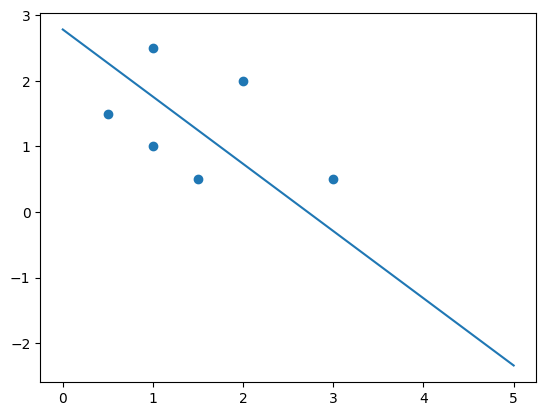

In [67]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  

w, b = gradient_descent(x_train, y_train, 100000, 1e-1)

x0 = np.arange(0,6)
x1 = (-b - (x0 * w[0])) / w[1]
print(w, b)

plt.scatter(x_train[:, 0], x_train[:, 1])
plt.plot(x0, x1)

print(compute_cost_logistic(x_train, y_train, w, b))